<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение-+-тестирование" data-toc-modified-id="Обучение-+-тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение + тестирование</a></span><ul class="toc-item"><li><span><a href="#Функция-splitting-для-разделения-выборки-на-тестовую-и-тренировочную" data-toc-modified-id="Функция-splitting-для-разделения-выборки-на-тестовую-и-тренировочную-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция splitting для разделения выборки на тестовую и тренировочную</a></span></li><li><span><a href="#Функция-make_features-для-формирования-признаков" data-toc-modified-id="Функция-make_features-для-формирования-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция make_features для формирования признаков</a></span></li><li><span><a href="#Функция-modeling-тренировки,-обучения-и-предсказания-моделей" data-toc-modified-id="Функция-modeling-тренировки,-обучения-и-предсказания-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Функция modeling тренировки, обучения и предсказания моделей</a></span></li><li><span><a href="#Перечень-параметров-и-список-моделей" data-toc-modified-id="Перечень-параметров-и-список-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Перечень параметров и список моделей</a></span></li><li><span><a href="#Запускаем--в-работу-модели-и-признаки" data-toc-modified-id="Запускаем--в-работу-модели-и-признаки-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Запускаем  в работу модели и признаки</a></span></li><li><span><a href="#Результаты-моделирования-+-график-полученных-RMSE-на-train-е-и-test-е." data-toc-modified-id="Результаты-моделирования-+-график-полученных-RMSE-на-train-е-и-test-е.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Результаты моделирования + график полученных RMSE на train-е и test-е.</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод.</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Задача исследования состоит в том, чтобы спрогнозировать количество заказов такси на следующий час для того, чтобы привлекать больше водителей в период пиковой нагрузки. 

План работы:
1. Загрузим данные и выполним их ресемплирование по одному часу.
2. Проведем EDA.
3. Обучим разные модели с различными гиперпараметрам(размер тестовой выборке задан: 10% от исходных данных).
4. Проверим данные на тестовой выборке и сделаем выводы. Требование заказчика: значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортируем необходимые для данных библиотеки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor

Считаем файл в DataFrame и назовем его df.

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

Посмотрим на данные файла. Выведем информацию о содержимом.

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


## Анализ

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Изменим тип данных Datetime с object на datetime64.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


В df 2 столбца признак время и таргет - кол-во заказов. Формат дат верный -datetime. Данные указаны за каждые 10 минут. 
<br>Установим индекс таблицы равным столбцу Datetime. 

In [7]:
df.set_index('datetime',inplace=True)
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Проверим, в хронологическом ли порядке расположены даты и время. Для этого вызовем is_monotonic. 

In [8]:
print(df.index.is_monotonic)

True


True - значит все в порядке. Построем график временного ряда.

<AxesSubplot:xlabel='datetime'>

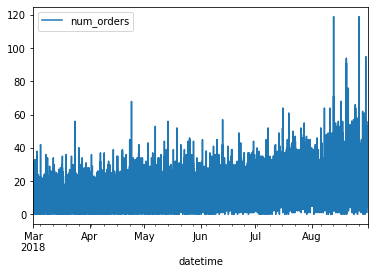

In [9]:
df.plot()

Наша задача провести ресемплирование по одному часу. Проведем его с суммированием данных за период.

<AxesSubplot:xlabel='datetime'>

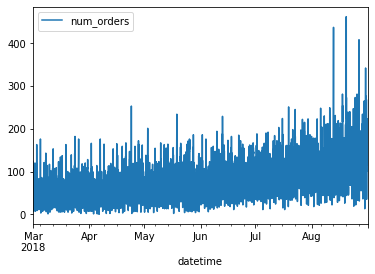

In [10]:
df = df.resample('1H').sum() 
df.plot()

Проверим пропуске в файле.

In [11]:
df.isna().mean()

num_orders    0.0
dtype: float64

## Обучение + тестирование

### Функция splitting для разделения выборки на тестовую и тренировочную

Создадим функцию splitting для разделения выборки на тестовую и тренировочную + разделение выборок на фичи(признаки) и таргет(целевой признак - num_orders).   

In [12]:
def splitting(df):
    train, test = train_test_split(df, shuffle=False, test_size=0.1)
    train = train.dropna()
    target_tr = train['num_orders']
    features_tr = train.drop('num_orders', axis = 1)
    target_tst = test['num_orders']
    features_tst = test.drop('num_orders', axis = 1)
    return features_tr, target_tr, features_tst, target_tst

### Функция make_features для формирования признаков

Создадим функцию make_features для формирования признаков. Предыдущие значения временного ряда подскажут, будет ли расти или уменьшаться количество заказов. Получим отстающие значения с помощью shift(). Также зададим скользящее среднее rolling_mean, которое задаст общий тренд временного ряда.

In [13]:
def make_features(data_, max_lag, rolling_mean_size):
    data = data_.copy()
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

### Функция modeling тренировки, обучения и предсказания моделей

Для компактности кода сздадим общую функцию. На вход она будет получить выборку. Модель и параметры. Внутри функции будет проводится формирование признаков, их разделение на тренировочную и тестовую выборки. Подбор параметров с поощью GridSearch. На выходе мы получим RMSE на тренировочной и тестовой выборках.

In [14]:
def modeling(model_,data,params):
    i_best = 0
    for i in range(1, 75, 1):
        data_ = make_features(data, i, i)
        features_train, target_train, features_test, target_test = splitting(data_)
        grid_best_estimator_=[]
        tscv = TimeSeriesSplit(n_splits=2)
        grid = GridSearchCV(model_,params, cv=tscv, scoring='neg_root_mean_squared_error')
        grid_fit = grid.fit(features_train, target_train)
        predicted_train = grid_fit.best_estimator_.predict(features_train)
        predicted_test = grid_fit.best_estimator_.predict(features_test)
        if i==1:
            mean_train = round(mean_squared_error(target_train,predicted_train,squared=False),2)
            mean_test = round(mean_squared_error(target_test,predicted_test,squared=False),2)
            best_t_pr = predicted_test
            best_t_tar = target_test
        elif round(mean_squared_error(target_test,predicted_test,squared=False),2)<mean_test:
            mean_train = round(mean_squared_error(target_train,predicted_train,squared=False),2)
            mean_test = round(mean_squared_error(target_test,predicted_test,squared=False),2)
            best_t_pr = predicted_test
            best_t_tar = target_test
    v = pd.DataFrame(best_t_tar)
    v['predicted_test'] = best_t_pr
    v.columns = ['target_test', 'predicted_test']
    v.plot(title = f'Target_test and predicted_test values with {model_}', ylabel = 'Number of orders', figsize = (10, 7))
    plt.show()
    return(model_, mean_train, mean_test, v.columns) 

### Перечень параметров и список моделей

<br> 1. Пареметры для GridSearch зададим отдельными словарями.<br>2. Модели и параметры добавим в список, чтобы запустить обучение компактно одним циклом. Все функции мы подготовили выше.<br>3. По получении результата будем добавлять RMSE на тренировочной и тестовой выборках в отдельный список. Чтобы позднее построить график. 

In [15]:
params_LR = {'fit_intercept': [True,False]}

params_DT = {'max_depth': [2, 3, 4, 5, 6, 8]} 

params_RF = {'n_estimators': [2, 3, 4, 5, 6, 8],
             'max_depth': [2, 3, 4, 5, 6, 8]} 

params_сat = {'learning_rate': [0.1, 0.2],
              'depth': [4, 6, 10, 16]}

params_LGB = {'task' : ['predict'],
              'n_estimators': [5, 10, 15],
              'learning_rate':[0.1, 0.2],
              'max_depth' :[5, 10, 15]}

params_ = [params_LR, params_DT, params_RF, params_сat, params_LGB]
models_ = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
           CatBoostRegressor(iterations=2), lgb.LGBMRegressor()]
RMSE_ = []
RMSE_min_test_ = []
model_best = []

### Запускаем  в работу модели и признаки

Запустим цикл по моделям и параметрам: линейной регрессии LinearRegression(), решающего дерева DecisionTreeRegressor(), случайного леса RandomForestRegressor(), ГБ с помощью CatBoost CatBoostRegressor(iterations=5) и U< c gjvjom. LightGBM lgb.LGBMRegressor().

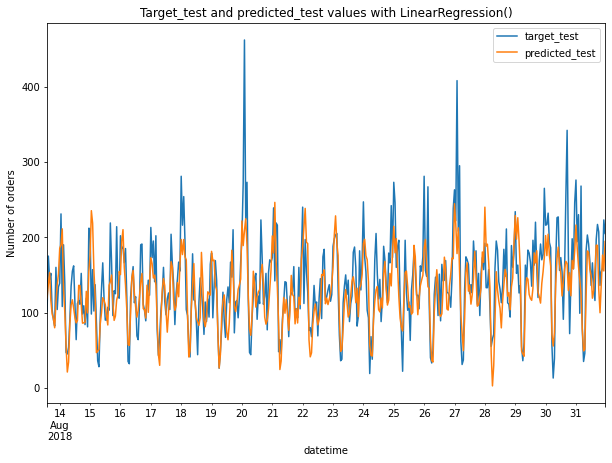

LinearRegression()
RMSE обучающей выборки: 22.57
RMSE тестовой выборки:  42.45
Index(['target_test', 'predicted_test'], dtype='object')


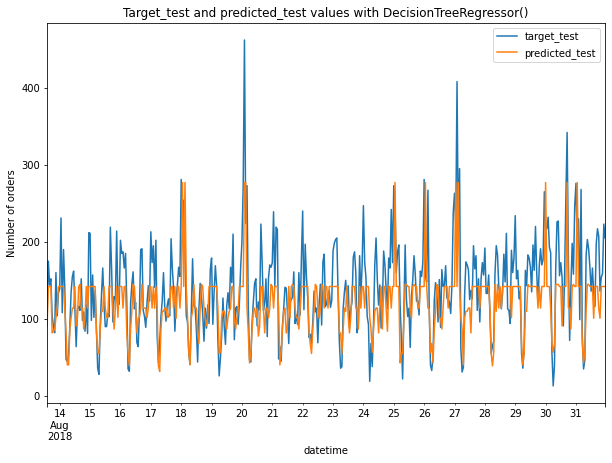

DecisionTreeRegressor()
RMSE обучающей выборки: 24.21
RMSE тестовой выборки:  48.63
Index(['target_test', 'predicted_test'], dtype='object')


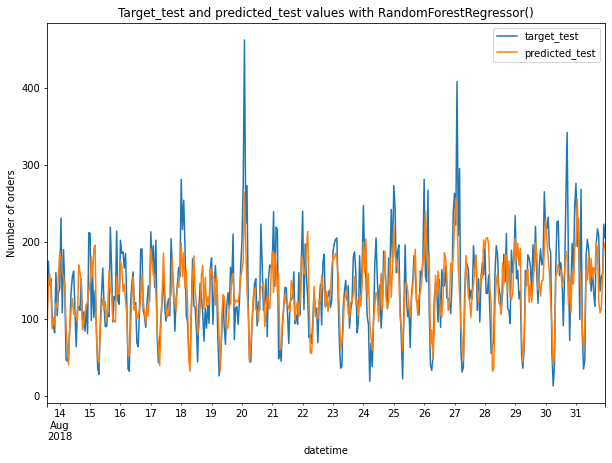

RandomForestRegressor()
RMSE обучающей выборки: 17.3
RMSE тестовой выборки:  41.69
Index(['target_test', 'predicted_test'], dtype='object')
0:	learn: 29.5839000	total: 46.5ms	remaining: 46.5ms
1:	learn: 28.9726522	total: 47ms	remaining: 0us
0:	learn: 32.5390489	total: 761us	remaining: 761us
1:	learn: 31.8226394	total: 1.39ms	remaining: 0us
0:	learn: 28.9265782	total: 472us	remaining: 472us
1:	learn: 27.9599004	total: 1.2ms	remaining: 0us
0:	learn: 31.7756098	total: 605us	remaining: 605us
1:	learn: 30.6053937	total: 1.23ms	remaining: 0us
0:	learn: 29.5756545	total: 875us	remaining: 875us
1:	learn: 28.9780230	total: 1.41ms	remaining: 0us
0:	learn: 32.5081840	total: 1ms	remaining: 1ms
1:	learn: 31.7971823	total: 1.99ms	remaining: 0us
0:	learn: 28.9080321	total: 811us	remaining: 811us
1:	learn: 27.9395440	total: 1.5ms	remaining: 0us
0:	learn: 31.7147326	total: 831us	remaining: 831us
1:	learn: 30.5834174	total: 1.84ms	remaining: 0us
0:	learn: 29.5852627	total: 2.69ms	remaining: 2.69ms
1:	le

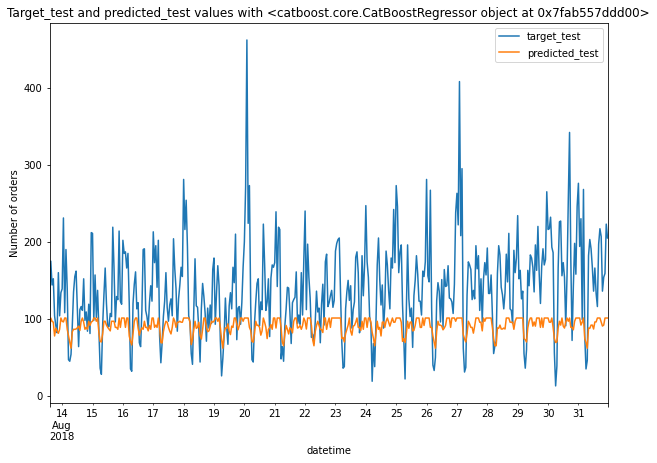

RMSE обучающей выборки: 32.34
RMSE тестовой выборки:  71.59
Index(['target_test', 'predicted_test'], dtype='object')


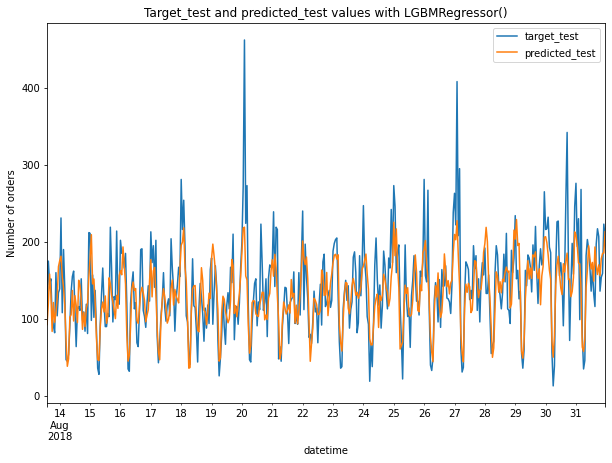

LGBMRegressor()
RMSE обучающей выборки: 18.59
RMSE тестовой выборки:  40.22
Index(['target_test', 'predicted_test'], dtype='object')


In [16]:
for i in range(len(models_)):
    model_, rmse_train_, rmse_test_,m = modeling(models_[i], df, params_[i])                   
    print(model_)
    print("RMSE обучающей выборки:", rmse_train_)
    print("RMSE тестовой выборки: ", rmse_test_)
    print(m)
    RMSE_.append(rmse_train_)
    RMSE_min_test_.append(rmse_test_)
    model_best.append(model_)

### Результаты моделирования + график полученных RMSE на train-е и test-е.

Загрузим данные в DataFrame. Постоим график, чтобы визуализировать полученные результаты: RMSE на тренировочных и тестовых данных.

,RMSE,RMSE_test
LinearRegression(),22.57,42.45
DecisionTreeRegressor(),24.21,48.63
RandomForestRegressor(),17.30,41.69
<catboost.core.CatBoostRegressor object at 0x7fab557ddd00>,32.34,71.59
LGBMRegressor(),18.59,40.22


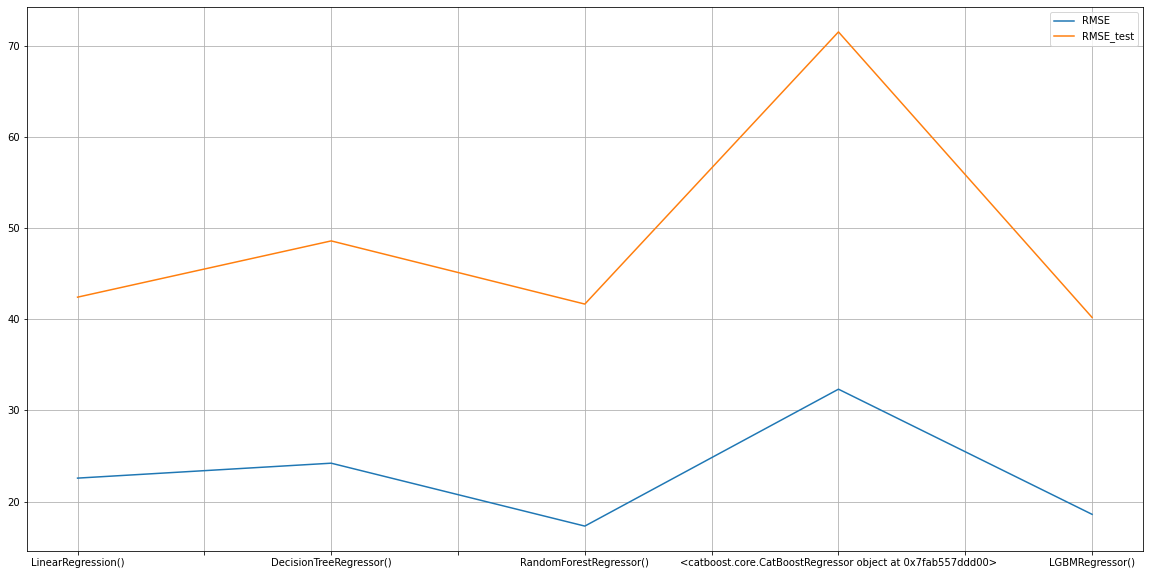

In [17]:
r =  {'RMSE': RMSE_ , 'RMSE_test':RMSE_min_test_}
results=pd.DataFrame(data=r,index=model_best)
results.plot(figsize=(20,10))
plt.grid()
results

## Проверка модели на адекватность 

In [18]:
i_best = 0
for i in range(1, 10, 1):
    df_ = make_features(df, i, i).copy()
    features_train, target_train, features_test, target_test = splitting(df_)
    dummy = DummyRegressor(strategy = 'mean').fit(features_train, target_train)
    dummy_pred = dummy.predict(features_test)
    if i==1:
        mean_dummy = round(mean_squared_error(target_test,dummy_pred,squared=False),2)
    elif round(mean_squared_error(target_test,dummy_pred,squared=False),2)<mean_dummy:
        mean_dummy = round(mean_squared_error(target_test,dummy_pred,squared=False),2)

print ('RMSE DummyRegressor:', mean_dummy)

RMSE DummyRegressor: 84.7


Полученное значение RMSE c помощью DummyRegressor выше нашего. Значит, наша работа проделана не даром.

## Вывод.

**Вывод** Минимальный RMSE на тестовый выборке получен с помощью LGBMRegressor(). Значение 40.22. Эту модель и будем рекомендовать заказчику для прогнозирования количества заказов такси на следующий час.